<a href="https://colab.research.google.com/github/guiraojpg/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - **Rio de Janeiro-RJ**
*by [Guirao]*

<img alt="cristo redentor" width="95%" src="https://raw.githubusercontent.com/guiraojpg/Data-Science/main/cristo%20redentor.jpg">





O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [41]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-01-26/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - numero de id para identificar
* name - nome da proprieadade anunciada 
neighbourhood_groupa - nome do bairro 
* ...

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,201,5,258,2020-12-26,2.01,1,286
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.84,11,357
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.05,1,300
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,350,2021-01-24,2.79,1,84
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,492,3,18,2016-02-09,0.19,2,365


In [5]:
df.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26101,47888031,Ap na Barra da Tijuca,144504093,Júlia,NaN,Barra da Tijuca,-23.005520,-43.349010,Private room,120,1,0,NaN,NaN,1,365
26102,47888598,Ocean Dream,14429812,Jorge,NaN,Barra da Tijuca,-23.011030,-43.330020,Entire home/apt,540,3,0,NaN,NaN,1,9
26103,47890020,Leblon - 01#,12643632,Julio,NaN,Leblon,-22.984395,-43.221371,Entire home/apt,400,3,0,NaN,NaN,2,357
26104,47891970,Club Spa Wave Ipanema,43428586,Gisele,NaN,Ipanema,-22.984872,-43.204786,Entire home/apt,990,3,0,NaN,NaN,2,364
26105,47893235,Copacabana near the beach!,15175491,Pricila,NaN,Copacabana,-22.974895,-43.195000,Entire home/apt,250,1,0,NaN,NaN,5,363


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print(df.shape)

print ("Entradas: \t {}".format(df.shape[0]))
print ("Variáveis: \t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

(26106, 16)
Entradas: 	 26106
Variáveis: 	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               26106
reviews_per_month                  9641
last_review                        9641
name                                 29
host_name                            17
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
id                                    0
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]


neighbourhood_group               1.000000
reviews_per_month                 0.369302
last_review                       0.369302
name                              0.001111
host_name                         0.000651
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

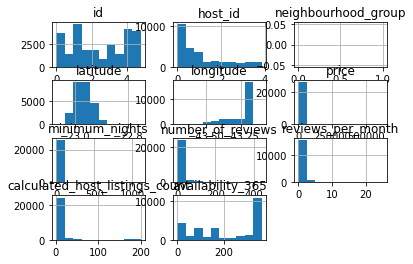

In [9]:
# plotar o histograma das variáveis numéricas
df.hist();


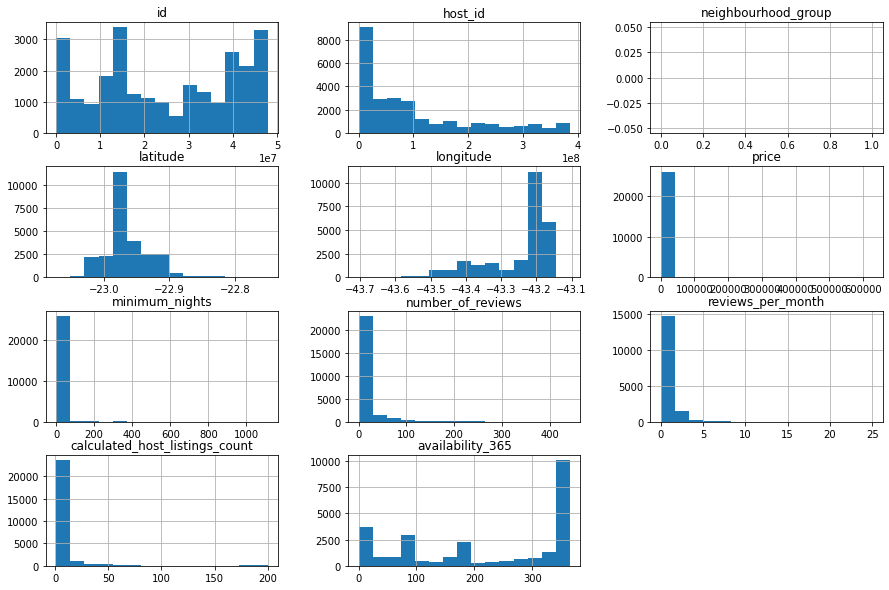

In [10]:
df.hist(bins=15, figsize=(15,10));

### **Q4. *Há* *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [11]:
# ver o resumo estatístico das variáveis numéricas
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.610600e+04,2.610600e+04,0.0,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,16465.000000,26106.000000,26106.000000
mean,2.481213e+07,9.887453e+07,NaN,-22.965736,-43.249050,730.843025,4.773041,12.170536,0.628580,7.473991,219.485942
std,1.552028e+07,1.069369e+08,NaN,0.035059,0.096562,5149.399193,20.163878,29.630677,0.856965,23.984729,141.180753
min,1.787800e+04,3.607000e+03,NaN,-23.072920,-43.704790,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.207002e+07,1.429208e+07,NaN,-22.984550,-43.304680,160.000000,1.000000,0.000000,0.090000,1.000000,87.000000
50%,2.304366e+07,5.978330e+07,NaN,-22.971630,-43.196495,294.000000,2.000000,2.000000,0.270000,1.000000,259.000000
75%,4.056460e+07,1.505854e+08,NaN,-22.951113,-43.186370,591.000000,4.000000,9.000000,0.900000,3.000000,363.000000
max,4.789324e+07,3.859628e+08,NaN,-22.749820,-43.104860,626623.000000,1111.000000,442.000000,25.000000,200.000000,365.000000


In [12]:
#nao precisa de todas as informações, como ID, HOST , etc
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26106.000000,26106.000000,26106.000000,16465.000000,26106.000000,26106.000000
mean,730.843025,4.773041,12.170536,0.628580,7.473991,219.485942
std,5149.399193,20.163878,29.630677,0.856965,23.984729,141.180753
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,160.000000,1.000000,0.000000,0.090000,1.000000,87.000000
50%,294.000000,2.000000,2.000000,0.270000,1.000000,259.000000
75%,591.000000,4.000000,9.000000,0.900000,3.000000,363.000000
max,626623.000000,1111.000000,442.000000,25.000000,200.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 591, porém seu valor máximo é 626623.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

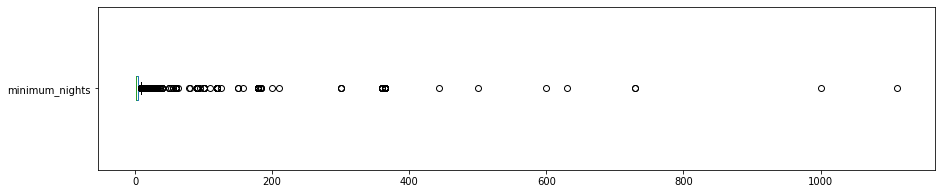

minimun_nights: Valores acima de 30:
197 entradas
0.7546%


In [13]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3));
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimun_nights: Valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

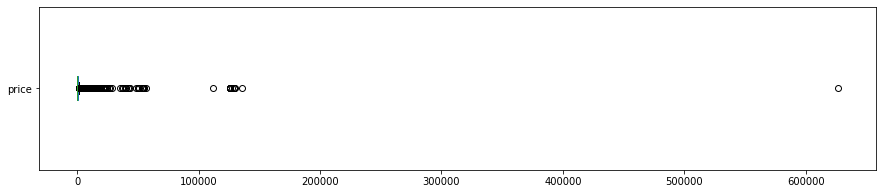

price: valores acima de 1500:
1810 entradas
6.9333%


In [33]:
#price
df.price.plot(kind="box", vert=False, figsize=(15,3));
plt.show()

#ver a quantidade de valores acima de 1500 para price
print("price: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

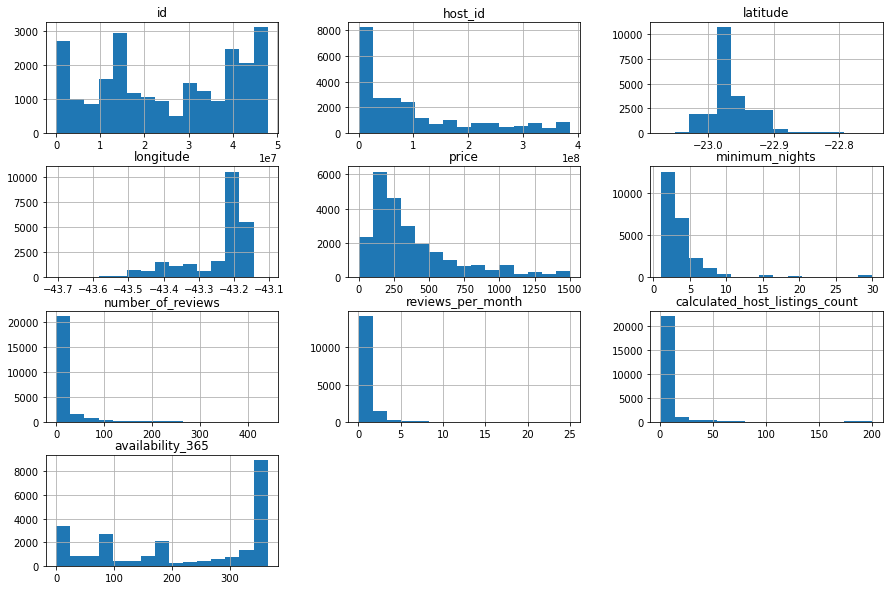

In [15]:
#remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover *neighbourhood_group*, pois está vazio
df_clean.drop("neighbourhood_group", axis=1, inplace=True)

#plotar o histograma para as variaveis numericas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price`
print(df_clean.price.mean())

df_clean.price.describe()


377.2082832386717


count    24121.000000
mean       377.208283
std        316.138703
min          0.000000
25%        150.000000
50%        265.000000
75%        500.000000
max       1500.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [17]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.117643,-0.153369,-0.148958,0.127688,0.080563
minimum_nights,0.117643,1.000000,-0.068089,-0.105121,-0.050997,-0.013631
number_of_reviews,-0.153369,-0.068089,1.000000,0.588639,-0.051800,-0.065451
reviews_per_month,-0.148958,-0.105121,0.588639,1.000000,-0.009867,-0.131633
calculated_host_listings_count,0.127688,-0.050997,-0.051800,-0.009867,1.000000,0.035285
availability_365,0.080563,-0.013631,-0.065451,-0.131633,0.035285,1.000000


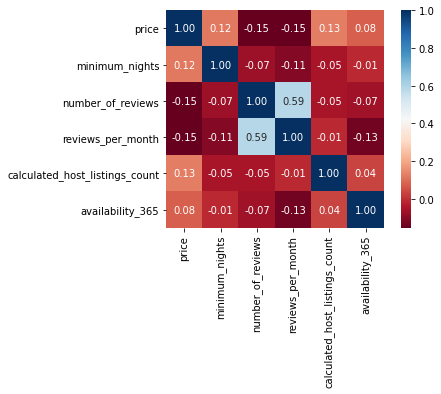

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    17092
Private room        6338
Shared room          586
Hotel room           105
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.room_type.value_counts().sum()

Entire home/apt    0.708594
Private room       0.262759
Shared room        0.024294
Hotel room         0.004353
Name: room_type, dtype: float64

In [21]:
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.708594
Private room       0.262759
Shared room        0.024294
Hotel room         0.004353
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [22]:
# ver preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre        1304.0
Cavalcanti           925.0
Vaz Lobo             822.0
Anchieta             800.0
Cacuia               795.0
Freguesia (Ilha)     747.0
Osvaldo Cruz         610.0
Sepetiba             558.8
Manguinhos           558.5
Realengo             546.2
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [23]:
# ver quantidade de imoveis em Vista Alegre
print(df_clean[df_clean.neighbourhood == "Vista Alegre"].shape)

# ver as entradas de imoveis em Vista Alegre
df_clean[df_clean.neighbourhood == "Vista Alegre"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7917,13654995,Cozy colonial style room,79273288,Sérgio,Vista Alegre,-22.8286,-43.31916,Private room,1304,1,1,2016-08-05,0.02,1,365


poder ser um possível outlier, só existe 1 entrada

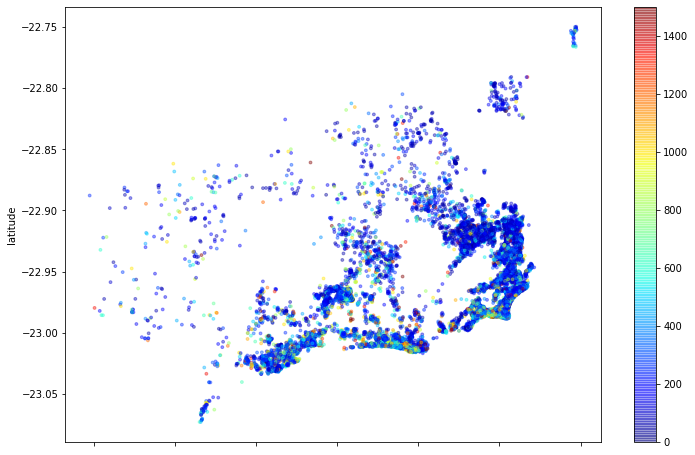

In [36]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [25]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.describe()

count    24121.000000
mean         3.477551
std          4.178193
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         30.000000
Name: minimum_nights, dtype: float64

#WordCloud

In [44]:
# instalar wordcloud
!pip install wordcloud -q
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [27]:
# ver a quantidade de valores ausentes
print("Valores ausentes para name: ", df_clean.name.isnull().sum())

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['name'], axis=0)['name']

Valores ausentes para name:  20


Basicamente, eu apenas eliminei os valores nulos da coluna `name` e atribui a Series a outra variável. Para criar a wordcloud, vou concatenar todas as strings, como se fosse uma linha única

In [28]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 965131


Agora sim, vamos para a biblioteca wordcloud. A primeira etapa consiste em criar uma lista de stopword, que basicamente são palavras que devem ser removidas da wordcloud, como "a", "não", "mas", "and", "I", "not", etc.

Na sequência, segue o comando para gerar a nuvem, seguindo as orientações da documentação oficial do pacote.

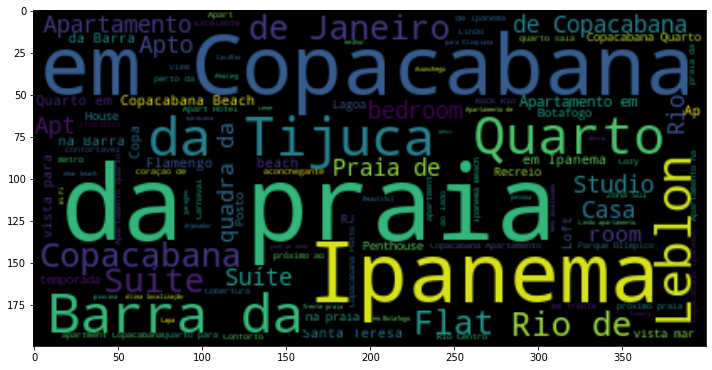

In [29]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Veja como algumas palavras como "meu" e "da" estão destacados, porém não acrescentam informação relevante. Podemos melhorar esse *wordcloud* atualizando a nossa lista de stopwords.

> Indented block

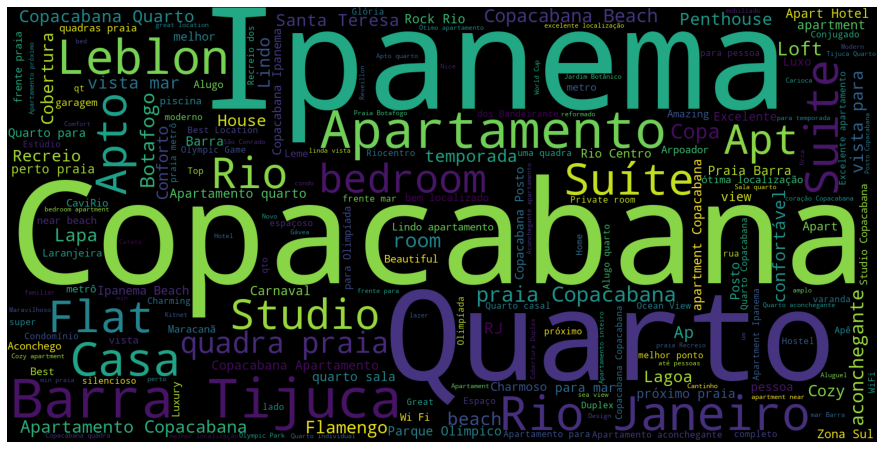

In [32]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "na"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png",)

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

#Criar uma WordCloud sobre uma imagem
Apenas essa nuvem já seria suficiente para uma análise. No entanto, se você quiser gerar um efeito visual a mais, saiba que é possível usar imagens como máscara nas wordclouds.

Uma vez que eu estou falando de Rio de Janeiro, que tal plotar as palavras sobre uma imagem do Cristo Redentor, símbolo da cidade?!

 <img alt="cristo redentor" width="20%" src="https://github.com/guiraojpg/Data-Science/blob/main/cristo%20mascara.png?raw=true">


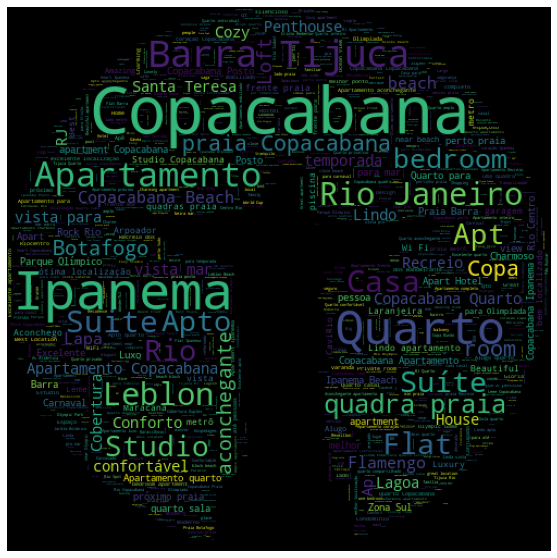

In [51]:
# endereço LOCAL da SUA imagem, ela deve estar no formato .jpg
rio_mask = np.array(Image.open("/content/cristo_jpg.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")


## Conclusões

https://github.com/guiraojpg/Data-Science/blob/main/cristo%20mascara.png?raw=true
